<a href="https://colab.research.google.com/github/komzy/spark-ml-course/blob/main/week-2/Session_4_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install plotly==4.14.3

In [30]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

! pip install koalas
!pip install loguru 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(3)])

df.show(3, False)


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+



In [31]:
from loguru import logger
logger.add("Getting_Started_Koalas_{time}.log")
import plotly 
logger.info(f'plotly_version{plotly.__version__}')


2021-04-26 20:25:50.301 | INFO     | __main__:<module>:4 - plotly_version4.14.3


In [ ]:
# Install compatible version of pyarrow (Only run if needed)
! pip install pyarrow

In [32]:
import seaborn as sns
import databricks.koalas as ks
ks.set_option('compute.ops_on_diff_frames', True)

## Exploratory Data Analysis using Koalas

As a first step, I want to explore the given data, its distribution, and dependency using Koalas API. I will include a simple example to demonstrate the idea, users can extend it for the problem in-hand.


In [ ]:
#!wget -q 'https://raw.githubusercontent.com/amjadraza/blogs-data/master/spark_ml/ccpp.csv'
#kdf_ccpp = ks.read_csv("ccpp.csv")
#kdf_ccpp.isnull().sum()

Read the data using Koalas `read_csv` method. To read more about the API follow the [Koalas official documentation](https://koalas.readthedocs.io/en/latest/?badge=latest) 

In [50]:
# Read the dailyprices of stocks
kdf_stocks = ks.read_csv("dailyPrices_AtClose.csv")
kdf_stocks.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [ ]:
# Read the dailyprices of stocks
kdf_X1 = ks.read_csv("X1Signals_AtClose.csv")
kdf_X1.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [ ]:
kdf_X2 = ks.read_csv("X2Signals_AtClose.csv")
kdf_X2.columns

Index(['t()', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50',
       'X51', 'X52', 'X53', 'X54', 'X55', 'X56'],
      dtype='object')

In [ ]:
print(kdf_stocks.shape)
print(kdf_X1.shape)
print(kdf_X2.shape)

(2771, 57)
(2769, 57)
(2769, 57)


In [ ]:
print(kdf_stocks.isnull().sum())

In [77]:
rolling_avg=kdf_stocks.rolling(window=50).mean() 
fig =ks.concat([kdf_stocks["X3"], rolling_avg["X3"].rename("X3_rollavg")],axis=1).sort_values(by=['Date'])
fig.set_index('Date')
fig.plot.line()



ValueError: ignored

In [ ]:
kdf_X1.plot.line(y='X3',x='t()')

In [ ]:
kdf_X2.plot.line(y='X3',x='t()') 

In [ ]:
kdf_stocks.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56
count,978.000000,1009.000000,2769.000000,2347.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,1935.000000,2769.000000,1884.000000,2769.000000,2769.000000,2769.000000,2122.000000,2769.000000,2431.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,126.000000,2769.000000,11.000000,702.000000,2769.000000,2769.000000,2769.000000,1764.000000,2769.000000,1735.000000,2769.000000,2075.000000,2769.000000,2769.000000,1297.000000,1297.000000,2769.000000,1964.000000,989.000000,2032.000000,2769.000000,2769.000000,2199.00000,2769.000000,1887.000000,2769.000000,2769.000000,2655.000000,2769.000000,2769.000000,2769.000000,799.000000,947.000000
mean,47.372009,47.450240,30.002073,48.726673,47.053587,22.536786,22.704316,31.499365,17.299387,40.368427,12.002734,44.797423,32.037971,39.436003,22.890590,40.331420,13.316063,23.155314,55.472304,43.965033,45.867734,28.336951,28.336951,73.013616,26.810974,40.081818,55.509527,49.608361,49.608361,19.031271,33.781686,28.336951,66.403561,44.149647,25.150694,42.570695,22.274480,23.025571,29.886208,60.411647,59.431235,43.879970,51.924259,15.509881,99.659112,23.14297,61.415186,13.719651,39.158257,43.194567,47.825363,21.729495,20.702823,37.180291,30.190476,55.320209
std,7.289463,8.966514,8.430849,13.129556,24.971548,7.564017,13.011221,7.814852,5.375074,19.318590,5.636116,10.611501,11.966890,39.467422,16.524645,10.674470,7.589846,9.079866,23.347842,20.831593,10.425307,5.828690,5.828690,2.657287,8.764617,0.480725,11.867864,22.960526,22.960526,6.528773,15.962153,5.828690,19.858817,18.169971,16.596867,37.623522,13.323339,4.098243,5.102741,16.616182,19.685829,10.330355,13.046440,9.905678,82.428309,6.60741,27.900160,3.200755,33.082999,15.077705,20.886531,4.407773,10.421623,8.969457,11.179699,9.897227
min,37.420900,32.487100,12.829485,12.812022,18.617020,10.760470,4.514504,20.082495,6.499510,9.900310,4.136301,12.780717,16.243363,1.725600,5.645000,25.791426,5.431894,8.928470,25.882919,15.100206,28.934400,17.342642,17.342642,67.586300,14.679925,39.390000,39.803807,19.985341,19.985341,9.064970,12.982711,17.342642,23.129637,22.891171,2.094400,2.094400,7.792755,14.683300,15.921500,37.240288,23.445655,26.020000,30.014600,5.261226,18.330000,5.60000,26.697122,6.213900,10.669763,22.883581,18.150000,14.053334,4.051097,18.972700,14.310000,41.454600
25%,42.585600,38.904800,24.486062,41.314827,28.260969,17.251622,11.810788,26.715576,14.274098,28.716419,7.802844,36.510456,21.870881,6.635300,10.900000,32.423715,7.625087,17.782361,38.602482,26.321390,38.142891,24.041843,24.041843,70.760241,18.481911,39.610000,49.464430,29.223442,29.223442,13.895530,19.735375,24.041843,52.735648,29.128993,15.350000,17.140000,12.011747,20.256500,26.609700,48.464870,37.903750,34.620000,43.711500,8.519073,34.050000,18.76000,35.749134,11.940200,19.254971,35.164908,27.500000,18.585555,14.302456,30.073700,19.070000,49.387800
50%,45.927700,49.052800,28.004784,50.469156,33.789427,19.588871,16.928472,29.331267,17.036596,35.464466,9.892882,48.084472,29.770658,24.444200,14.840000,37.912502,9.452205,20.471341,44.965271,38.890789,43.485009,26.467653,26.467653,72.811541,24.148975,40.000000,53.082174,42.503961,42.503961,16.933384,31.804800,26.467653,69.049805,34.756538,19.765000,23.595000,15.903617,22.295200,29.847900,55.458206,65.551400,43.520000,50.352200,10.574250,66.650000,23.43000,53.007062,13.595700,24.076123,39.288871,47.580000,19.866853,16.565938,36.355700,30.410000,52.195700
75%,49.187600,52.720800,34.448216,56.294887,65.451877,28.506444,33.553690,38.054424,21.360561,46.165956,17.710602,53.085033,43.668061,65.171500,32.175000,47.109132,18.612534,27.016384,80.861065,61.292893,55.666776,32.284616,32.284616,74.979088,35.288403,40.490000,57.704899,67.771101,67.771101,23.755269,41.750011,32.284616,79.728645,62.923979,3

In [ ]:

#dummy_data = {kdf_stocks['X1'],kdf_X1['X1']}

# data= {kdf_stocks.loc[:, ['t()', 'X1']], kdf_X1.loc[:, ['t()', 'X1']] }
# print(data.columns)
# print(data.shape)

dd= kdf_X1.X3.rename("X3_X1signal")
ddd=kdf_X2.X3.rename("X3_X2signal")
df4 =ks.concat([kdf_stocks["X3"], dd, ddd],axis=1)
df4.shape


(2771, 3)

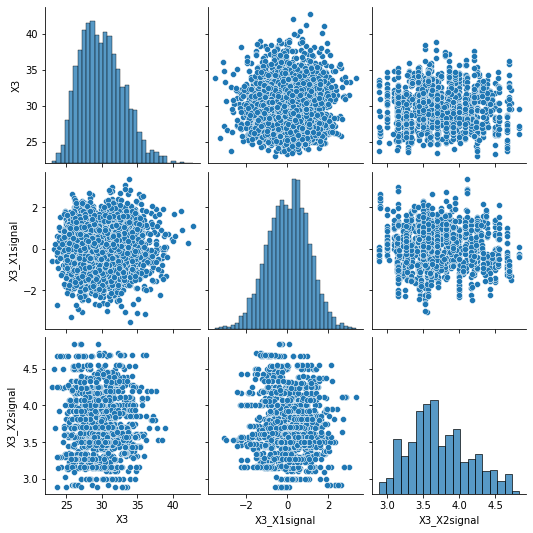

In [ ]:
sns.pairplot(df4.rolling(window=10).mean().to_pandas())

In [ ]:
#select every 11th row
TODO
kdf_stocks["index"] = kdf_stocks.index
kdf_stocks.head()

In [51]:
#drop rows which are entirely null
print(kdf_stocks.shape)
kdf_stocks=kdf_stocks.set_index('t()')
print(kdf_stocks.shape)
kdf_stocks=kdf_stocks.dropna(how='all')
kdf_stocks["Date"] = kdf_stocks.index
print(kdf_stocks.shape)

(2771, 57)
(2771, 56)
(2769, 57)


In [53]:
kdf_stocks_X3=kdf_stocks.loc[:, ['Date', 'X3']]
#kdf_stocks_X3.plot.line(y='X1',x='t()')


print(kdf_stocks_X3.shape)
kdf_stocks_X3=ks.concat([kdf_stocks_X3,
                         kdf_stocks_X3.X3.shift().rename("1"),
                         kdf_stocks_X3.X3.shift(2).rename("2"),
                         kdf_stocks_X3.X3.shift(3).rename("3"),
                         kdf_stocks_X3.X3.shift(4).rename("4"),
                         kdf_stocks_X3.X3.shift(5).rename("5"),                         
                         kdf_stocks_X3.X3.shift(6).rename("6"),
                         kdf_stocks_X3.X3.shift(7).rename("7"),                       
                         kdf_stocks_X3.X3.shift(8).rename("8"), 
                         kdf_stocks_X3.X3.shift(9).rename("9"), 
                         kdf_stocks_X3.X3.shift(10).rename("10")],axis=1).sort_values(by=['Date'])                                   

kdf_stocks_X3=kdf_stocks_X3.iloc[10:]  #remove the first 9 rows that have NAN
#kdf_stocks_X3=kdf_stocks_X3.set_index('t()') 

#kdf_stocks_X3.head()
print(kdf_stocks_X3.shape)
#kdf_stocks_X3.plot.line()


(2769, 2)
(2759, 12)


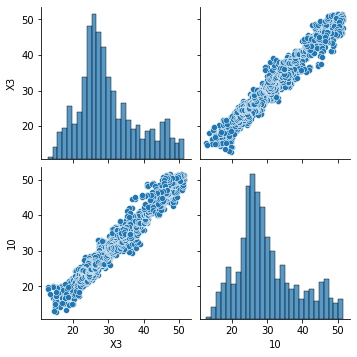

In [54]:
relationship_withpast =ks.concat([kdf_stocks_X3.X3, kdf_stocks_X3['10']],axis=1)
relationship_withpast.plot.line()
sns.pairplot(relationship_withpast.to_pandas())
#type(fig)

#HIGH CORRELATION between actual stock value and value from 10 days ago

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,Date,index
t(),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-03,45.8466,39.8955,17.521205,46.667887,19.053180,19.711178,11.743176,21.664902,16.787895,NaN,4.633858,46.553970,17.430290,1.8352,10.365,28.772561,6.201433,23.013117,41.374280,21.985622,32.239635,25.388436,25.388436,NaN,14.968238,NaN,NaN,27.633905,27.633905,11.577728,NaN,25.388436,NaN,29.443306,2.2963,2.2963,7.808235,18.7883,24.7124,38.517564,NaN,NaN,35.2389,5.329133,20.95,28.96,32.165719,16.0163,22.949870,29.390111,NaN,20.434832,15.995224,29.9910,NaN,50.7604,2005-01-03,2005-01-03
2005-01-04,45.8103,39.9288,17.329738,46.319778,18.938198,19.643724,11.647966,21.796096,16.767126,NaN,4.555906,46.206594,17.376800,1.8626,10.240,28.556832,6.191296,23.320136,41.815761,21.740236,32.123404,25.286484,25.286484,NaN,14.759227,NaN,NaN,27.340468,27.340468,11.208499,NaN,25.286484,NaN,29.458765,2.2006,2.2006,7.862245,18.6712,24.4285,38.243138,NaN,NaN,35.2898,5.278192,21.31,28.74,31.863555,16.2299,22.722644,28.797392,NaN,20.211238,16.004092,30.3400,NaN,50.4923,2005-01-04,2005-01-04
2005-01-05,45.3294,40.0037,17.034457,45.892188,18.997662,19.448159,11.563979,21.628379,16.471335,NaN,4.443528,45.780096,17.733282,1.8763,10.070,28.437846,6.132547,22.888394,40.803501,21.461483,32.319617,25.082675,25.082675,NaN,14.690727,NaN,NaN,27.007961,27.007961,11.311420,NaN,25.082675,NaN,29.086619,2.0944,2.0944,7.848126,18.4100,24.1354,38.287668,NaN,NaN,35.2643,5.261226,21.49,28.07,31.959723,15.9295,22.085422,28.079927,NaN,19.794360,15.826448,30.3275,NaN,50.2837,2005-01-05,2005-01-05
2005-01-06,44.6487,40.1786,17.385526,46.667887,19.021430,19.596487,11.726341,21.628379,16.518067,NaN,4.479501,46.553970,17.862431,1.8822,10.235,28.266700,6.156876,22.782926,40.727329,22.680162,32.363260,25.097293,25.097293,NaN,14.809635,NaN,NaN,27.014458,27.014458,11.244818,NaN,25.097293,NaN,29.241680,2.1625,2.1625,7.792755,18.5361,24.1537,38.562004,NaN,NaN,35.3407,5.271423,21.26,28.60,32.158843,15.8561,22.964689,28.360631,NaN,19.770166,15.604467,30.0761,NaN,51.0137,2005-01-06,2005-01-06
2005-01-07,44.6760,40.1953,17.425426,46.606831,18.981787,19.502105,11.597555,21.446125,16.528452,NaN,4.473495,46.492972,18.271326,1.8179,10.365,28.311381,6.164986,22.850077,41.107910,22.397378,32.130618,25.082675,25.082675,NaN,14.831328,NaN,NaN,26.844911,26.844911,11.214536,NaN,25.082675,NaN,29.513060,2.1156,2.1156,7.907325,18.6622,24.1995,38.895714,NaN,NaN,35.8326,5.303341,21.29,28.52,32.103930,15.9028,24.268772,28.150078,NaN,19.407613,15.693240,30.2081,NaN,50.9914,2005-01-07,2005-01-07


## Model Building using PySpark

Once the EDA and Feature engineering done, it is time to build the predictive model. One of the benefits of using the Koalas dataframe is that users can create a Spark dataframe seamlessly. In the below section, I demonstrate the use of PySpark API to build and train Gradient Boosting Machines (GBM).

In [ ]:
# Create the moving average features
#kdf = kdf_ccpp.rolling(window=20, min_periods=1).mean()

In [55]:
# Convert the Koalas DataFrame into Spark DataFrame
sdf = kdf_stocks_X3.to_spark()

In [56]:
sdf.show(5,False)

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|Date      |X3       |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|2005-01-18|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|17.329738|17.521205|
|2005-01-19|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|17.329738|
|2005-01-20|18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|17.034457|
|2005-01-21|18.07972 |18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|17.385526|
|2005-01-24|18.223343|18.07972 |18.614312|18.598334|18.502554|17.481305|17.433461|17.210037|17.321703|17.569049|17.425426|
+----------+----

Now, build the model using PySpark API. For moe details on building models using PySpark refer to my article [Machine Learning With Spark](https://towardsdatascience.com/machine-learning-with-spark-f1dbc1363986).

In [57]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

In [243]:
# Create the feature column using VectorAssembler class
vectorAssembler = VectorAssembler(inputCols =["1","2","3","4","5","6","7","8","9","10"], 
                                  outputCol = "features")
vpp_sdf = vectorAssembler.transform(sdf)

In [244]:
# Define train and test data split
# splits = vpp_sdf.randomSplit([0.7,0.3])
# train_df = splits[0]
# test_df = splits[1]

# truncated=vpp_sdf.limit(vpp_sdf.count()-1848) #done because of RAM running out
# train=truncated.limit(truncated.count()-10)
# test=spark.createDataFrame(truncated.tail(10),truncated.columns)

train=vpp_sdf.limit(vpp_sdf.count()-10)
test=spark.createDataFrame(vpp_sdf.tail(10),vpp_sdf.columns)

test.show()




+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|            features|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|35.006702|[34.800259,34.269...|
|2015-12-18|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|[33.709065,34.800...|
|2015-12-21|34.711784|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|[34.407036,33.709...|
|2015-12-22|35.793148|34.711784|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462|[34.711784,34.

In [245]:
# Define and fit Linear Regression
lr = LinearRegression(featuresCol="features", labelCol="X3")
lr_model = lr.fit(train)
lr_predictions=lr_model.transform(test)

In [246]:
lr_predictions.show()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|            features|        prediction|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|35.006702|[34.800259,34.269...| 34.75105993812669|
|2015-12-18|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|[33.709065,34.800...| 33.72624267977181|
|2015-12-21|34.711784|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|[34.407036,33.709...| 34.42020037988626|
|2015-12-22|35.793148|

In [247]:
lr_model.summary.rootMeanSquaredError 

0.5677588289071797

In [248]:
kdf_lr_predictions = ks.DataFrame(lr_predictions)
kdf_lr_predictions[['X3', 'prediction']].plot()

In [249]:
from pyspark.ml.regression import GBTRegressor
# Define the GBT Model
gbt = GBTRegressor(featuresCol="features", labelCol="X3")
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)

In [250]:
gbt_predictions.show()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+------------------+
|      Date|       X3|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|            features|        prediction|
+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------------+------------------+
|2015-12-17|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|35.006702|[34.800259,34.269...|35.157687644198106|
|2015-12-18|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|35.360602|[33.709065,34.800...| 33.94643643429836|
|2015-12-21|34.711784|34.407036|33.709065|34.800259|34.269408|33.600928|33.640251|34.495511| 34.81009|34.672462| 34.81009|[34.407036,33.709...| 35.13225498926002|
|2015-12-22|35.793148|

In [251]:
# Evaluate the GBT Model
gbt_evaluator = RegressionEvaluator(labelCol="X3", predictionCol="prediction", metricName="rmse")
gbt_rmse = gbt_evaluator.evaluate(gbt_predictions)
print("The RMSE of GBT Tree regression Model is {}".format(gbt_rmse))

The RMSE of GBT Tree regression Model is 0.8786535773250649


In [252]:
kdf_gbt_predictions = ks.DataFrame(gbt_predictions)
kdf_gbt_predictions[['X3', 'prediction']].plot()

In [253]:
from pyspark.ml.regression import DecisionTreeRegressor
# Define the Decision Tree Model 
dt = DecisionTreeRegressor(featuresCol="features", labelCol="X3")
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)

In [254]:
dt_evaluator = RegressionEvaluator(labelCol="X3", predictionCol="prediction", metricName="rmse")
dt_rmse = dt_evaluator.evaluate(dt_predictions)
print("The RMSE of Decision Tree regression Model is {}".format(dt_rmse))

The RMSE of Decision Tree regression Model is 0.8695454280169314


In [255]:
kdf_dt_predictions = ks.DataFrame(dt_predictions)
kdf_dt_predictions[['X3', 'prediction']].plot()